# Wish.com Product Rating Prediction

### Task 1 MEME

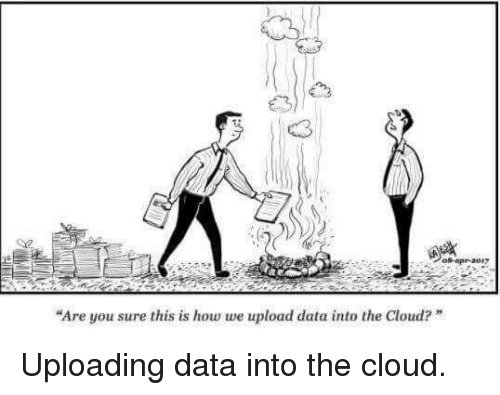

### Task 2 Problem Formulation

The goal of this project is to estimate the rating of a certain product on Wish.com based on a set of criteria. The variables comprising product data that are thought to contribute to the rating score will be used as input in this case. The product rating will be the output. The preprocessing steps such as categorical encoding, imputation, feature scaling, and feature normalisation is esstional for effective preprocessing methods and choosing the relevant features to enhance model performance. The effect of this effort would help customers to buy with confidence from Wish.com, as well as provide a deeper knowledge of product aspects that contribute to a certain product's quality. As a result, a model that generalises effectively to a large variety of items with both low and high quality ratings would be a viable solution to this issue. the evalution metric f1-score is suited for this task, since we don't only want the model to be exact in recognising genuine positives, but also sensitive to false negatives.


### Task 3. Understand the Template Code

In [4138]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # import template model 
from sklearn.metrics import f1_score  # f1-score evaluation metric  
from pprint import pprint # pretty print is used in the interpreter to present Python objects in a nice way.
from sklearn.metrics import classification_report #import classification_report

In [4139]:
from google.colab import drive # connet to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4140]:
data = pd.read_csv('/content/drive/MyDrive/train_new.csv').sample(frac=1) #shuffle
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # selects a portion of data with numeric ratings of 1, 2, 3, 4, or 5.
data = data.fillna(0) # fills all NaN values in the dataset
data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # dropping metadata columns with no descriptive value

In [4141]:
msk = np.random.rand(len(data)) < 0.7 # creates a mask to randomly sample indices to pick 70% of the dataset
tr = data[msk] # Select 70% of the dataset for training.
val = data[~msk] # Using the inverse mask, choose the remaining 30% of the dataset for validation.

In [4142]:
tr # training data

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
15,13.0,15,EUR,100,0,4.0,55,1,0,0,...,0,CN,huanjun411,huanjun411,"93 % avis positifs (3,276 notes)",3276,4.428571,0,summer,2020-08
318,11.0,43,EUR,10000,0,4.0,2521,0,0,0,...,0,CN,"ShenZhen Lianbotongshi Co.,Ltd",shenzhenlianbotongshicoltd,"88 % avis positifs (15,502 notes)",15502,4.115275,0,summer,2020-08
631,9.0,135,EUR,100,0,4.0,33,0,0,0,...,0,CN,juxinchengxiu,juxinchengxiu,"(9,940 notes)",9940,4.048994,0,summer,2020-08
438,9.0,8,EUR,100,0,4.0,27,0,0,0,...,0,US,arthumcco,arthumcco,"92 % avis positifs (34,975 notes)",34975,4.336583,0,summer,2020-08
466,11.0,50,EUR,5000,0,4.0,869,0,0,0,...,0,CN,snowgirl,snowgirl,"84 % avis positifs (36,361 notes)",36361,3.967520,0,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,7.0,50,EUR,1000,1,4.0,408,0,0,0,...,Quantité limitée !,CN,llegaiyy,llegaiyy,"84% ردود فعل إيجابية (12,763 تصنيفات)",12763,3.967484,0,summer,2020-08
91,6.0,8,EUR,10000,0,4.0,1338,0,0,0,...,0,CN,young's boutique,youngsboutique,"80 % avis positifs (54,504 notes)",54504,3.801684,1,summer,2020-08
60,9.0,9,EUR,10000,1,4.0,2148,0,0,0,...,0,CN,New Lucky,homeaccessoryinternational,"89 % avis positifs (246,312 notes)",246312,4.203725,0,summer,2020-08
545,11.0,11,EUR,1000,0,4.0,213,0,0,0,...,Quantité limitée !,CN,ONLYZY,onlyzy,"82 % avis positifs (17,120 notes)",17120,3.898890,0,summer,2020-08


In [4143]:
dict_cat = {} # Dictionary for storing categorical column encodings


# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list()


def cat_digit(col):  
    # build the mapping
    encoded = col.astype('category').cat.codes
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded)))
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col))
tr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
15,13.0,15,0,100,0,4.0,55,1,0,0,...,0,1,357,189,602,3276,4.428571,0,0,0
318,11.0,43,0,10000,0,4.0,2521,0,0,0,...,0,1,185,382,457,15502,4.115275,0,0,0
631,9.0,135,0,100,0,4.0,33,0,0,0,...,0,1,369,213,139,9940,4.048994,0,0,0
438,9.0,8,0,100,0,4.0,27,0,0,0,...,0,3,256,24,591,34975,4.336583,0,0,0
466,11.0,50,0,5000,0,4.0,869,0,0,0,...,0,1,478,402,287,36361,3.967520,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,7.0,50,0,1000,1,4.0,408,0,0,0,...,1,1,403,265,302,12763,3.967484,0,0,0
91,6.0,8,0,10000,0,4.0,1338,0,0,0,...,0,1,553,524,189,54504,3.801684,1,0,0
60,9.0,9,0,10000,1,4.0,2148,0,0,0,...,0,1,148,173,501,246312,4.203725,0,0,0
545,11.0,11,0,1000,0,4.0,213,0,0,0,...,1,1,151,324,218,17120,3.898890,0,0,0


In [4144]:
print('categorical features')
pprint(list(dict_cat.keys())) # lists the dictionary's category encodings' keys; use pprint(dict cat) to view the entire dictionary.

categorical features
['currency_buyer',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'theme',
 'crawl_month']


In [4145]:
print('Lets see what the mapping for column origin_country :')
pprint(dict_cat['origin_country']) # encoding category for the origin country field
print('It is a string to integer mapping')

Lets see what the mapping for column origin_country :
{0: 0, 'CN': 1, 'SG': 2, 'US': 3, 'VE': 4}
It is a string to integer mapping


In [4146]:
# then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)
val

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
737,2.90,3,0,100,1,4.0,19,0,0,0,...,0.0,1.0,-1.0,-1.0,-1.0,163,4.190184,0,0,0
1029,3.00,3,0,100,0,4.0,12,0,0,0,...,1.0,1.0,-1.0,-1.0,-1.0,38100,4.291470,0,0,0
490,7.00,6,0,100,0,3.0,4,0,0,0,...,1.0,1.0,321.0,117.0,243.0,10474,3.908535,0,0,0
409,11.00,30,0,1,0,5.0,0,0,0,0,...,0.0,1.0,-1.0,-1.0,-1.0,1380,4.007246,0,0,0
516,5.90,5,0,5000,1,3.0,425,0,0,0,...,1.0,1.0,214.0,454.0,547.0,6357,4.254208,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,6.00,145,0,100,1,4.0,52,0,0,0,...,0.0,1.0,-1.0,-1.0,-1.0,2602,4.159493,0,0,0
217,5.90,5,0,5000,0,3.0,531,0,0,0,...,0.0,1.0,-1.0,-1.0,-1.0,7069,4.055029,0,0,0
69,15.00,13,0,5000,0,4.0,1257,0,0,0,...,0.0,1.0,-1.0,-1.0,-1.0,19184,4.471018,0,0,0
816,5.89,5,0,100,1,4.0,48,0,0,0,...,1.0,1.0,-1.0,-1.0,-1.0,150,3.993333,0,0,0


In [4147]:
tr_y = tr['rating'] # slice containing label
tr_x = tr.drop('rating', axis=1) # slice containing all variables except the target
clf = LogisticRegression().fit(tr_x, tr_y)  # fit in Logistic Regression Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [4148]:
val_y = val['rating'] # slice containing label
val_x = val.drop('rating', axis=1) # slice containing all variables except the target
pred_val = clf.predict(val_x) # generate prefiction

In [4149]:
val_score = f1_score(val_y, pred_val, average='micro') # compute micro f1-score on the validation split using predictions
print(val_score) #print f1-score

0.7087378640776699


In [4150]:
# once you are happy with your local model, let's prepare a submission
# we need to apply the same preprocessing steps on the testing set as you did before you train the model

test_data = pd.read_csv('/content/drive/MyDrive/test_new.csv').sample(frac=1) # read testing data
_id = test_data['id'] # keep track of  identifiers for assigning predictions
test_data = test_data.fillna(0) # fill all NaNs with 0
test_data = test_data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # dropping  irrelevant  columns
test_data[cat_cols] = test_data[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))  # creating numerical encoding

# again, not-seen string value filled with -1
test_data = test_data.fillna(-1)

In [4151]:
pred_test = clf.predict(test_data)  # generate predictions
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test}) # generate dataframe in appropriate submission format
pred_df.to_csv('pred_walkthrough.csv', index=False) # create csv for submission

In [4152]:
len(pred_test)

479

##### additional questions

**What is the experimental protocol used and how was it carried out? What preprocessing steps are used?**

The experimental protocol used is typical of multi-class classification and categorization problems. This is accomplished employing a training split to train the model, followed by a holdout/validation/development set to evaluate the performance of the trained model before testing. 

**What preprocessing steps are used in the template?**

1. read the train/test data into a dataframe in a shuffled sequence.
2. Take the dataframe's slice and replace any NaN values with 0.
3. Drop the unrelated columns
4. split the data with 30% of the training data for validation/development and 70% of the training data for training. 
5. encoding all categorical columns
6. If a string value appears in the validation split but not the training split, it is replaced with -1.
7.  fit the LogisticRegression classifier.
8. calculate 1f-score
9. the test set goes through the same preprocessing procedures.
10. create cvs file

## Task 4 - Model Tuning and Documentation

### Trial 1 - imrpvoving data preprocessing

Assumption: The model's performance can be enhanced via input data reduction, PCA, and appropriate feature selection.

#### feature selection

In [4153]:
cols_to_keep = [] # list of columns to keep
abs_corr = tr.corr().abs() # compute absolute correlation
for i, rating in enumerate(abs_corr.rating):
  # keep all columns with a greater correlation
  if rating > 0.1 and abs_corr.index[i] != 'rating':
    cols_to_keep.append(abs_corr.index[i]) # append column name by the index
cols_to_keep # print the columns

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


['price',
 'badges_count',
 'badge_product_quality',
 'shipping_option_price',
 'merchant_info_subtitle',
 'merchant_rating']

In [4154]:
#slice of the datasets
tr_x1 = tr[cols_to_keep]
val_x1 = val[cols_to_keep]
test_x1 = test_data[cols_to_keep]

In [4155]:
from sklearn import preprocessing
# adjusting the input to one scale
tr_x1 = pd.DataFrame(preprocessing.scale(tr_x1))
val_x1 = pd.DataFrame(preprocessing.scale(val_x1))
test_x1 = pd.DataFrame(preprocessing.scale(test_x1)) 

In [4156]:
clf1 = LogisticRegression().fit(tr_x1, tr_y)  #create Logistic Regression Model
# fit in Logistic Regression Model


In [4157]:
##traning f1_score
f1_score(tr_y, clf1.predict(tr_x1), average='micro')

0.7206632653061225

In [4158]:
##validation f1_score
f1_score(val_y, clf1.predict(val_x1), average='micro')

0.7508090614886731

#### PCA

In [4159]:
from sklearn.decomposition import KernelPCA #import KernelPCA
kpca =KernelPCA(n_components = 5,kernel ='linear') # create KernelPCA model
kpca.fit_transform(tr_x1) #fit train data
tr_x2 = kpca.transform(tr_x1) # projecting training data into a new dimisions
val_x2 = kpca.transform(val_x1)  # projecting validation data into a new dimisions
test_x2 = kpca.transform(test_x1) #  # projecting testing data into a new dimisions

In [4160]:
clf2 = LogisticRegression().fit(tr_x2, tr_y) # creeat Logistic Regression Model
 # fit in Logistic Regression Model

In [4161]:
##traning f1_score
f1_score(tr_y, clf2.predict(tr_x2), average='micro')

0.7219387755102041

In [4162]:
##validation f1_score
f1_score(val_y, clf2.predict(val_x2), average='micro')

0.7572815533980582

### Trail 2 & 3 :  decision tree model with  2 different configurations/hyper-parameters 

#### DecisionTree model 1

In [4163]:
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', splitter='random', max_depth=100).fit(tr_x1, tr_y) # ctreate and fit in DecisionTree model

In [4164]:
##traning f1_score
f1_score(tr_y, clf3.predict(tr_x1), average='micro')

0.9923469387755102

In [4165]:
##validation f1_score
f1_score(val_y, clf3.predict(val_x1), average='micro')

0.540453074433657

#### DecisionTree model2

the fisr DecisionTree model has some overfiting issue.So I have adjust the max_depth into 6. the overfiting issue resovle a little bit

In [4166]:
clf4 = DecisionTreeClassifier(criterion='entropy', splitter='best',max_leaf_nodes= 5, max_depth=6).fit(tr_x2, tr_y) # create and fit in DecisionTreeClassifier

In [4167]:
##traning f1_score
f1_score(tr_y, clf4.predict(tr_x2), average='micro')

0.7232142857142857

In [4168]:
##validation f1_score
f1_score(val_y, clf4.predict(val_x2), average='micro')

0.6213592233009708

### Trial 4&5: SVM model with 2 different configurations/hyper-parameters

#### SVM model 3

In [4169]:
from sklearn.svm import SVC #import svm model
clf5 = SVC(kernel='linear',random_state=0).fit(tr_x2,tr_y) #create and fit in SVM model

In [4170]:
##traning f1_score
f1_score(tr_y, clf5.predict(tr_x2), average='micro')

0.701530612244898

In [4171]:
##validation f1_score
f1_score(val_y, clf5.predict(val_x2), average='micro')

0.7249190938511326

#### SVM model 4

since the first SVM model has no overfiting issue, so i plan to  increase the model complexity by adjusting the kernel into poly type with degree of 3. the perforamce of the model has improved a little bit

In [4197]:
clf6 = SVC(kernel='poly',degree = 3, gamma='auto', random_state=2).fit(tr_x2,tr_y) #create and fit in SVM model

In [4198]:
##traning f1_score
f1_score(tr_y, clf6.predict(tr_x2), average='micro')

0.7423469387755102

In [4199]:
##validation f1_score
f1_score(val_y, clf6.predict(val_x2), average='micro')

0.7475728155339806

### Trial6 Naive Bayesian model

In [4175]:
from sklearn.naive_bayes import GaussianNB #import Naive Bayesian model
clf7 = GaussianNB().fit(tr_x2,tr_y) # fit Naive Bayesian model

In [4176]:
##training f1_score
f1_score(tr_y, clf7.predict(tr_x2), average='micro')

0.6607142857142857

In [4177]:
##validation f1_score
f1_score(val_y, clf7.predict(val_x2), average='micro')

0.6828478964401294

In [4178]:
clf8 = GaussianNB().fit(tr_x2,tr_y) # fit Naive Bayesian model

In [4179]:
##training f1_score
f1_score(tr_y, clf8.predict(tr_x2), average='micro')

0.6607142857142857

In [4180]:
##validation f1_score
f1_score(val_y, clf8.predict(val_x2), average='micro')

0.6828478964401294

### Trial7 RandomForest

In [4216]:
# from scipy.sparse.construct import random
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
clf9 = RandomForestClassifier(n_estimators=6,criterion='entropy',random_state=2,max_depth=15).fit(tr_x2, tr_y) # create RandomForestClassifier

In [4217]:
#trainig f1_score
f1_score(tr_y, clf9.predict(tr_x2), average='micro')

0.951530612244898

In [4218]:
#validation f1_score
f1_score(val_y, clf8.predict(val_x2), average='micro')

0.6828478964401294

### Trial8: AdaBoostClassifier

In [4256]:
from sklearn.ensemble import AdaBoostClassifier #import AdaBoostClassifier
clf10 = AdaBoostClassifier(n_estimators=11,learning_rate = 0.6).fit(tr_x2,tr_y) # create AdaBoostClassifier

In [4259]:
#trainig f1_score
f1_score(tr_y, clf10.predict(tr_x2) , average='micro')

0.6836734693877551

In [4260]:
#validation f1_score
f1_score(val_y, clf10.predict(val_x2), average='micro')


0.7378640776699028

### Trial9: KNeighborsClassifier

In [4187]:
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
clf11 = KNeighborsClassifier(n_neighbors=5, algorithm = 'kd_tree' ,leaf_size = 15 ).fit(tr_x2,tr_y) #create KNeighborsClassifier

In [4188]:
#training f1_score
f1_score(tr_y, clf10.predict(tr_x2), average='micro')

0.6313775510204082

In [4189]:
# validation f1_score
f1_score(val_y, clf11.predict(val_x2), average='micro')

0.6828478964401294

###  create csv using test data

found the model with the best f1_score on validation data

In [4190]:
# print classification_report
pred_val10 = clf6.predict(val_x2)
print(classification_report(val_y, pred_val10))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         3
         3.0       1.00      0.03      0.05        36
         4.0       0.75      1.00      0.85       224
         5.0       0.78      0.16      0.26        45

    accuracy                           0.75       309
   macro avg       0.50      0.24      0.23       309
weighted avg       0.77      0.75      0.66       309


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4261]:
pred_test11 = clf10.predict(test_x2) # generate prediction using test dataset

In [4262]:
# create csv for submission
pred_df2 = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test11})
pred_df2.to_csv('pred_walkthrough11.csv', index=False) 

download csv from colab

In [4263]:
# from google.colab import files
# files.download("pred_walkthrough11.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Task 5  Answer the questions below 

**Q1 Why Data Mining is a misnomer? What is another preferred name?**


Data mining is the process of extracting valuable, non-trivial knowledge from large amounts of information. However, mining means the extraction of all data  without any reason. Other preferred names are  data analysis, business analysis ,and  knowledge discovery in dataset.

**Q2 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?**

The general knowledge discovery method explains how to analyse data and extract knowledge. Raw data collecting, data pre-processing (cleaning), data warehousing, identifying task-relevant data, and evaluating any patterns necessary to synthesise knowledge from the data are all required.

The differences between a data engineer and a data scientist/AI engineer are as follows. 
Data engineers design and manage critical data infrastructures like as databases, data warehouses, and data pipelines. Data engineers also prepare raw, unstructured data for production by turning it into a structured format that can be studied and processed.Data scientists analyse and interpret data to address business challenges. Data scientists first investigate data and do market research in order to generate business inquiries about a certain trend or pain point.


**Q3 In data mining, what is the difference between prediction and categorization?**

Classification is the process of determining the category or class label to which a new observation belongs. The process of detecting missing or unavailable numerical data for a new observation is known as prediction.

**Q3 Why data science/machine learning is a bad idea in the context of information security?**

Machine learning requires large amounts of data, which sometimes includes personal information obtained without the explicit knowledge of customers or individuals. This personal information could be exposed in the event of a data breach.   Aside from the data leak, certain forecast information generated by ML models may be regenerated into original data, and render some people vulnerable.

**Q4 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**

CIA stands for Confidentiality, Integrity, and Availability. The CIA is a standard paradigm that serves as the foundation for the development of security systems. They are used to identify vulnerabilities and strategies for developing solutions.


Confidentiality refers to an organization's efforts to keep material secret or confidential. Access to information must be managed in order to avoid unwanted data sharing, whether deliberate or unintentional. Restricted data can be classified and labelled, access control policies can be enabled, data can be encrypted, and multi-factor authentication (MFA) systems can be used. It is also crucial to ensure that everyone in the business has the necessary training and information to identify and prevent problems.

Integrity entails ensuring that your data is trustworthy and free of tampering. The integrity of your data is only preserved if it is authentic, accurate, and dependable. Hashing, encryption, digital certificates, and digital signatures are all options. For websites, you may use trusted certificate authorities (CAs) to validate the legitimacy of your website, ensuring that visitors get the site they meant to view.

Availability refers to whether the confidentiality and integrity mechanisms are accessible to the organization's employees and consumers. This implies that systems, networks, and applications must function as expected and at the appropriate times. Organizations may assure availability through redundant networks, servers, and applications. These can be set to become accessible in the event that the principal system has been compromised. You may also improve availability by keeping up with software package and security system updates. This reduces the likelihood of an application malfunctioning or a relatively new danger invading your system. Additionally, backups and approach to disaster recovery plans enable a corporation restore accessibility quickly after an adverse incident.